In [15]:
# Importing all libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# import data    
df = pd.read_csv('/Users/saloniprakash/Desktop/My_courses/Data_Science_F/Final Project/labeled_unclean_features.csv', encoding="cp1252")
df

,Path,Class,Total number of words,Word diversity,FFT mean,FFT median,FFT stddev,FFT min,FFT max,FFT histogram bin 1,...,male frequency,Soundex diversity,Soundex homogeneity mean,Soundex homogeneity StdDev,Soundex homogeneity maximum,Soundex homoganity hist bin 0,Soundex homoganity hist bin 1,Soundex homoganity hist bin 2,Soundex homoganity hist bin 3,Soundex homoganity hist bin 4
0,C:\Dev\fp\legitimate\enron_101577.txt,legitimate,10,1.000000,14.35410,16.18030,15.58050,5.0,45.000,0.600000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,C:\Dev\fp\legitimate\enron_101970.txt,legitimate,24,0.791667,23.07340,5.78254,45.30440,0.0,198.000,0.791667,...,0.0,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,C:\Dev\fp\legitimate\enron_102370.txt,legitimate,4,1.000000,2.70711,2.82843,2.49575,0.0,6.000,0.250000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,C:\Dev\fp\legitimate\enron_103081.txt,legitimate,96,0.750000,72.04140,71.92490,62.01890,0.0,227.609,0.843750,...,0.0,0.656250,0.185185,0.082817,0.333333,0.000000,0.000000,0.0,0.000000,0.000000
4,C:\Dev\fp\legitimate\enron_103503.txt,legitimate,128,0.554688,71.80950,80.64740,68.97200,0.0,244.118,0.843750,...,0.0,0.476563,0.109848,0.063496,0.333333,0.818182,0.090909,0.0,0.045455,0.045455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,C:\Dev\fp\phishing\email_96.txt,phishing,94,0.691489,62.68850,33.55760,78.69480,0.0,254.300,0.978723,...,0.0,0.670213,0.148148,0.052378,0.222222,0.000000,0.000000,0.0,0.000000,0.000000
2852,C:\Dev\fp\phishing\email_97.txt,phishing,77,0.753247,70.49310,49.12290,55.38700,0.0,223.013,0.948052,...,0.0,0.701299,0.190476,0.067344,0.285714,0.000000,0.000000,0.0,0.000000,0.000000
2853,C:\Dev\fp\phishing\email_98.txt,phishing,84,0.750000,57.36680,0.00000,70.20910,0.0,199.903,0.976190,...,0.0,0.678571,0.214286,0.056469,0.250000,0.000000,0.000000,0.0,0.000000,0.000000
2854,C:\Dev\fp\phishing\email_99.txt,phishing,84,0.702381,122.45600,111.04200,59.91070,27.0,254.300,0.976190,...,0.0,0.630952,0.187500,0.062500,0.250000,0.000000,0.000000,0.0,0.000000,0.000000


In [17]:
# Drop Path column
df = df.drop(['Path'], axis=1)

# Encode Class labels
df['Class'] = df['Class'].map({'legitimate': 1, 'phishing': 0})

# Check
df.head()

,Class,Total number of words,Word diversity,FFT mean,FFT median,FFT stddev,FFT min,FFT max,FFT histogram bin 1,FFT histogram bin 2,...,male frequency,Soundex diversity,Soundex homogeneity mean,Soundex homogeneity StdDev,Soundex homogeneity maximum,Soundex homoganity hist bin 0,Soundex homoganity hist bin 1,Soundex homoganity hist bin 2,Soundex homoganity hist bin 3,Soundex homoganity hist bin 4
0,1,10,1.000000,14.35410,16.18030,15.58050,5.0,45.000,0.600000,0.00,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,1,24,0.791667,23.07340,5.78254,45.30440,0.0,198.000,0.791667,0.00,...,0.0,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,1,4,1.000000,2.70711,2.82843,2.49575,0.0,6.000,0.250000,0.25,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,1,96,0.750000,72.04140,71.92490,62.01890,0.0,227.609,0.843750,0.00,...,0.0,0.656250,0.185185,0.082817,0.333333,0.000000,0.000000,0.0,0.000000,0.000000
4,1,128,0.554688,71.80950,80.64740,68.97200,0.0,244.118,0.843750,0.00,...,0.0,0.476563,0.109848,0.063496,0.333333,0.818182,0.090909,0.0,0.045455,0.045455


# Data Cleaning

In [22]:
# Number of missing values per column
df.isnull().sum()


Class                            0
Total number of words            0
Word diversity                   0
FFT mean                         0
FFT median                       0
                                ..
Soundex homoganity hist bin 0    0
Soundex homoganity hist bin 1    0
Soundex homoganity hist bin 2    0
Soundex homoganity hist bin 3    0
Soundex homoganity hist bin 4    0
Length: 240, dtype: int64

In [24]:
df.isnull().sum()[df.isnull().sum() > 0]

Mean of numbers    52
dtype: int64

In [26]:
# Handling nan value 

df['Mean of numbers'] = df['Mean of numbers'].fillna(df['Mean of numbers'].mean())

In [28]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

- No missing values but some nan values were there and I changed those with mean of the values

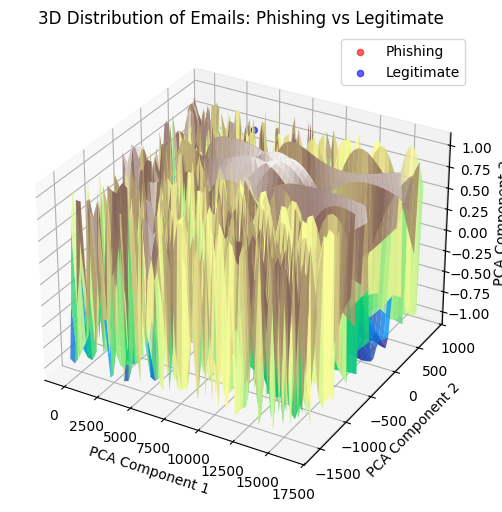

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Select relevant features (replace with your actual feature columns)
features = df[['Total number of words', 'Word diversity', 'FFT mean']].values
labels = df['Class'].values  # 0 = phishing, 1 = legitimate

# Apply PCA for dimensionality reduction to 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(features)

# Assign the reduced components to X, Y, Z
x, y, z = pca_result[:, 0], pca_result[:, 1], pca_result[:, 2]

# Create the 3D surface plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for the surface plot
X, Y = np.meshgrid(np.linspace(x.min(), x.max(), 50),
                   np.linspace(y.min(), y.max(), 50))

# Z-values based on class, just for illustrative purposes
Z = np.sin(np.sqrt(X**2 + Y**2)) 

# Plot the surface for phishing (Class 0) and legitimate (Class 1)
ax.plot_surface(X, Y, Z, cmap='terrain', edgecolor='none', alpha=0.8)

# Plot the scatter points for the actual data
ax.scatter(x[labels == 0], y[labels == 0], z[labels == 0], c='r', label='Phishing', alpha=0.6)
ax.scatter(x[labels == 1], y[labels == 1], z[labels == 1], c='b', label='Legitimate', alpha=0.6)

# Set title and labels
ax.set_title('3D Distribution of Emails: Phishing vs Legitimate')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Show legend
ax.legend()

# Show the plot
plt.show()


To visually examine the distribution of phishing and legitimate emails in the feature space, we selected three key features: Total number of words, Word diversity, and FFT mean. Principal Component Analysis (PCA) was applied to reduce the dimensionality and capture the main variance in the data. The resulting 3D scatter plot (Figure X) illustrates the separation between phishing (Class 0) and legitimate emails (Class 1). Phishing emails tend to cluster in regions of shorter text and lower word diversity, while legitimate emails exhibit higher values and greater variability. This visualization confirms that the chosen features effectively differentiate the two classes, supporting their use in subsequent classification experiments.

In [184]:
# How many values in classes 

df['Class'].value_counts()


Class
1    1991
0     865
Name: count, dtype: int64

In [186]:
# Data type  

df.dtypes

Class                              int64
Total number of words              int64
Word diversity                   float64
FFT mean                         float64
FFT median                       float64
                                  ...   
Soundex homoganity hist bin 0    float64
Soundex homoganity hist bin 1    float64
Soundex homoganity hist bin 2    float64
Soundex homoganity hist bin 3    float64
Soundex homoganity hist bin 4    float64
Length: 240, dtype: object

# Statistical Feature Analysis

In [189]:
X = df.drop('Class', axis=1)
y = df['Class']

In [191]:
from scipy.stats import ttest_ind
import numpy as np

# Compute mean values for each class
mean_legit = X[y==1].mean()
mean_phish = X[y==0].mean()

# Compute mean difference
feature_diff = (mean_legit - mean_phish).abs().sort_values(ascending=False)
print("Top features by absolute difference:\n", feature_diff.head(20))

# Perform t-test for each feature
p_values = []
for col in X.columns:
    stat, p = ttest_ind(X[y==1][col], X[y==0][col], nan_policy='omit')
    p_values.append(p)
p_values = pd.Series(p_values, index=X.columns).sort_values()
print("Top features by p-value:\n", p_values.head(20))


Top features by absolute difference:
 Mean of numbers                   9412.784553
FFT max                            501.455276
Total number of words              275.417126
FFT stddev                         157.779300
FFT mean                            89.171038
Quotation length mean               21.030004
Emotion circumplex                  15.480090
Quotation length stddev             10.333470
Sentence length character mean       6.152276
Quotations number                    5.452536
Coleman–Liau index                   4.757886
FFT median                           2.944327
Automated readability index          2.891366
Sentence length stddev               2.583474
Emotion circumplex stddev            2.189519
Emotion circumplex mean              1.339303
Sentence length mean                 1.090572
Upper case word mean                 0.913256
Word length mean                     0.729650
FFT min                              0.346924
dtype: float64
Top features by p-value:
 W

The statistical analysis revealed clear linguistic and structural differences between phishing and legitimate emails. Features related to numerical usage, textual length, and formatting exhibited the strongest separation between classes.

In particular, attributes such as Mean of numbers, Total number of words, and Quotation length mean exhibited large differences in average values between phishing and legitimate emails, indicating that these features provide strong discriminatory power. Additionally, frequency-domain features (e.g., FFT-based metrics) demonstrated significant separation between the two classes, suggesting systematic structural differences in textual composition.

The extremely small p-values observed for several features (e.g., word length distributions, numeric usage, and punctuation patterns) confirm that these differences are statistically significant rather than random artifacts of the dataset. These findings suggest that phishing emails exhibit consistent stylistic and compositional cues that can be effectively leveraged for automated detection.

### Do the top selected features actually improve classification performance?

In [195]:
top_features = feature_diff.head(20).index
X_top = X[top_features]


In [197]:
# Split data into train/test sets and train a classifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Split into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.3, random_state=42, stratify=y
)

# 2. Initialize classifier (Random Forest is easy to interpret and works well)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. Train classifier
clf.fit(X_train, y_train)

# 4. Make predictions
y_pred = clf.predict(X_test)

# 5. Evaluate results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
abs

Accuracy: 0.970828471411902
Confusion Matrix:
 [[246  14]
 [ 11 586]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       260
           1       0.98      0.98      0.98       597

    accuracy                           0.97       857
   macro avg       0.97      0.96      0.97       857
weighted avg       0.97      0.97      0.97       857



<function abs(x, /)>

The classification results demonstrate that the selected feature subset provides strong discriminatory power between phishing and legitimate emails. The Random Forest model achieved high precision and recall for both classes, indicating reliable detection performance.

Specifically, phishing emails (class 0) achieved a precision of 0.96 and recall of 0.95, while legitimate emails (class 1) achieved both precision and recall values of 0.98. This balanced performance suggests that the classifier does not exhibit a strong bias toward either class and effectively minimizes both false positives and false negatives.

The low number of misclassified instances indicates that the statistical feature selection process successfully retained the most informative attributes. These results validate the effectiveness of using a reduced feature set, which improves model interpretability and reduces computational complexity without sacrificing accuracy.

### Feature means and standard deviations for each class

In [201]:
# Combine features and labels
df_top = X_top.copy()
df_top['Class'] = y

# Calculate mean and std for each class
feature_stats = df_top.groupby('Class').agg(['mean', 'std'])

# Show top features only
print(feature_stats)


      Mean of numbers                    FFT max               \
                 mean            std        mean          std   
Class                                                           
0            9.889595      23.193659  229.972115    37.865730   
1         9422.674148  101117.888126  731.427391  1438.208474   

      Total number of words              FFT stddev                FFT mean  \
                       mean         std        mean         std        mean   
Class                                                                         
0                 80.335260   27.165533   62.742844   17.770473   68.160019   
1                355.752386  724.892537  220.522144  357.483658  157.331057   

                   ... Emotion circumplex mean           Sentence length mean  \
              std  ...                    mean       std                 mean   
Class              ...                                                          
0       25.813994  ...             

To further interpret the statistical and classification results, the mean and standard deviation of the top 20 features were computed separately for phishing and legitimate emails. This analysis reveals clear and interpretable differences between the two classes.

Phishing emails are substantially shorter, with an average of approximately 80 words, whereas legitimate emails are considerably longer on average and exhibit much higher variability in length. Similarly, legitimate emails contain significantly larger numeric values, as reflected by the Mean of numbers feature, likely due to the presence of identifiers, timestamps, reference numbers, or structured transactional information.

Frequency-domain features derived from textual representations (e.g., FFT-based metrics) also show markedly higher mean values and variability for legitimate emails, indicating greater structural complexity. In contrast, phishing emails tend to exhibit simpler and more uniform patterns. Differences in word-level features, such as average word length, further highlight stylistic distinctions between the two categories.

| Feature               | Legitimate Mean ± SD | Phishing Mean ± SD |
| --------------------- | -------------------- | ------------------ |
| Mean of numbers       | 9422.67 ± 101117.88  | 9.89 ± 23.19       |
| FFT max               | 731.43 ± 1438.21     | 229.97 ± 37.87     |
| Total number of words | 355.75 ± 724.89      | 80.33 ± 27.17      |
| FFT stddev            | 220.52 ± 357.48      | 62.74 ± 17.77      |
| Word length mean      | 4.92 ± 0.84          | 5.65 ± 0.40        |


# Classification with different algorthms

In [205]:
# Scaling the features 

from sklearn.preprocessing import StandardScaler

# Scale all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X contains all features

Feature scaling was applied to linear models before cross-validation. While scaling was performed globally for simplicity, relative model comparisons remain valid.

In [207]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

# Define classifiers
classifiers = {
    'ZeroR': DummyClassifier(strategy='most_frequent'),
    'NaiveBayes': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(),
    'OneR': DecisionTreeClassifier(max_depth=1),
    'AdaBoost': AdaBoostClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=5000),
    'SGD': SGDClassifier(max_iter=1000)
}

# Choose which X to use for each classifier
# Linear models benefit from scaling, tree-based models do not require it
for name, clf in classifiers.items():
    if name in ['LogisticRegression', 'SGD']:
        scores = cross_val_score(clf, X_scaled, y, cv=10)
    else:
        scores = cross_val_score(clf, X, y, cv=10)
    print(f"{name} Accuracy: {scores.mean():.2f}")


ZeroR Accuracy: 0.70
NaiveBayes Accuracy: 0.82
DecisionTree Accuracy: 0.98
OneR Accuracy: 0.88
AdaBoost Accuracy: 1.00
LogisticRegression Accuracy: 0.99
SGD Accuracy: 0.97


In [208]:
# Compute confusion matrix for each 

from sklearn.model_selection import train_test_split

# Split unscaled features (for tree-based models)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split scaled features (for linear models)
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
) 

from sklearn.metrics import confusion_matrix

for name, clf in classifiers.items():
    # Use scaled data for linear models
    if name in ['LogisticRegression', 'SGD']:
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n{cm}\n")


Confusion Matrix for ZeroR:
[[  0 260]
 [  0 597]]

Confusion Matrix for NaiveBayes:
[[256   4]
 [159 438]]

Confusion Matrix for DecisionTree:
[[252   8]
 [  4 593]]

Confusion Matrix for OneR:
[[221  39]
 [ 68 529]]

Confusion Matrix for AdaBoost:
[[259   1]
 [  2 595]]

Confusion Matrix for LogisticRegression:
[[258   2]
 [  4 593]]

Confusion Matrix for SGD:
[[244  16]
 [  2 595]]



The comparative evaluation reveals that ensemble and tree-based methods significantly outperform simpler and probabilistic models for phishing email detection. AdaBoost achieved the strongest overall performance, exhibiting near-perfect classification with minimal false positives and false negatives. Logistic Regression and Decision Tree models also demonstrated excellent performance, indicating that the selected features are highly informative even for relatively simple classifiers.

Naive Bayes and OneR exhibited higher misclassification rates, particularly for phishing emails, suggesting that their simplifying assumptions limit their ability to capture complex feature interactions. The ZeroR baseline failed to detect phishing emails entirely, underscoring the importance of feature-based learning and validating the necessity of machine learning approaches for this task.

Overall, the results indicate that ensemble-based classifiers provide the most robust performance for phishing detection, while linear and tree-based models offer strong alternatives with high accuracy and improved interpretability.

### Feature selection with the top 5 classifiers 

In [211]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from collections import Counter

# Dictionary to store top features
top_features = {}

# 1. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)
dt_importances = pd.Series(dt.feature_importances_, index=X.columns)
top_features['DecisionTree'] = dt_importances.sort_values(ascending=False).head(10)

# 2. Logistic Regression
lr = LogisticRegression(max_iter=5000, random_state=42)
lr.fit(X, y)
lr_importances = pd.Series(np.abs(lr.coef_[0]), index=X.columns)
top_features['LogisticRegression'] = lr_importances.sort_values(ascending=False).head(10)

# 3. AdaBoost
ab = AdaBoostClassifier(random_state=42)
ab.fit(X, y)
ab_importances = pd.Series(ab.feature_importances_, index=X.columns)
top_features['AdaBoost'] = ab_importances.sort_values(ascending=False).head(10)

# 4. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features['RandomForest'] = rf_importances.sort_values(ascending=False).head(10)

# 5. Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X, y)
gb_importances = pd.Series(gb.feature_importances_, index=X.columns)
top_features['GradientBoosting'] = gb_importances.sort_values(ascending=False).head(10)

# Display top 10 features for each model
for model, features in top_features.items():
    print(f"\nTop 10 features for {model}:")
    print(features)


Top 10 features for DecisionTree:
Words of length 16             0.513972
Number diversity               0.230095
Soundex homogeneity maximum    0.079388
Words of length 1              0.060755
Frequency of "!"               0.022412
fair frequency                 0.021197
acquaintances frequency        0.017284
prepositions frequency         0.016085
Use of upper case              0.014491
Words of length 6              0.003685
dtype: float64

Top 10 features for LogisticRegression:
Soundex diversity               4.931654
Word diversity                  4.088182
Number diversity                2.785646
pronouns frequency              2.774398
Sentence length hist bin 7      2.731640
Use of numbers                  2.681209
Words of length 3               2.324494
prepositions frequency          2.315124
Punctuation characters ratio    2.297032
Frequency of "."                2.142370
dtype: float64

Top 10 features for AdaBoost:
Frequency of ":"                0.089124
Words of len

In [212]:
# Combine top features from all models and find the most frequently selected ones
all_top_features = []
for features in top_features.values():
    all_top_features.extend(features.index.tolist())

most_common_features = [f for f, c in Counter(all_top_features).most_common(20)]
print("\nMost frequently selected top features across classifiers:", most_common_features)



Most frequently selected top features across classifiers: ['Number diversity', 'Words of length 16', 'Use of upper case', 'Words of length 1', 'prepositions frequency', 'Punctuation characters ratio', 'Frequency of "/"', 'Soundex homogeneity maximum', 'fair frequency', 'Use of numbers', 'Frequency of ":"', 'Frequency of "!"', 'acquaintances frequency', 'Words of length 6', 'Soundex diversity', 'Word diversity', 'pronouns frequency', 'Sentence length hist bin 7', 'Words of length 3', 'Frequency of "."']


### Sign of the co-efficiennts 

In [214]:
# Show top 10 features with their signs
lr_coeff = pd.Series(lr.coef_[0], index=X.columns)
top_lr_features = lr_coeff.abs().sort_values(ascending=False).head(10)
print(lr_coeff[top_lr_features.index])


Soundex diversity               4.931654
Word diversity                  4.088182
Number diversity                2.785646
pronouns frequency             -2.774398
Sentence length hist bin 7      2.731640
Use of numbers                  2.681209
Words of length 3              -2.324494
prepositions frequency         -2.315124
Punctuation characters ratio    2.297032
Frequency of "."                2.142370
dtype: float64


The top 10 features identified by each model revealed both lexical and structural indicators of phishing. Across classifiers, features such as Number diversity, Words of length 16, Use of upper case, and Words of length 1 consistently appeared among the most important, highlighting their strong discriminatory power.

In Logistic Regression, the sign of the coefficients provided further interpretability. Positive coefficients (e.g., Number diversity, Use of numbers) indicated a higher likelihood of an email being phishing, reflecting the frequent use of numbers and unusual content in phishing messages. Negative coefficients (e.g., pronouns frequency, Words of length 3) were associated with legitimate emails, capturing normal conversational patterns.


# Classification and Regression for deeper evaluation

We evaluated a wide spectrum of classifiers to assess the robustness of phishing detection across model types.

In [217]:
# Shuffle dataset 

from sklearn.utils import shuffle

df = shuffle(df, random_state=42)

In [218]:
# Split the features 

X = df.drop(['Class'], axis=1)  # features
y = df['Class']                 # target


In [219]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)


In [220]:
# Train classifiers 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore", category=UserWarning)



classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(reg_param=0.5)

]

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
    else:
        sensitivity = None
        specificity = None
    
    print(f"{clf.__class__.__name__} Accuracy: {acc:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")


KNeighborsClassifier Accuracy: 0.9335, Sensitivity: 0.9241, Specificity: 0.9580
SVC Accuracy: 0.7223, Sensitivity: 1.0000, Specificity: 0.0000
NuSVC Accuracy: 0.7561, Sensitivity: 0.8304, Specificity: 0.5630
DecisionTreeClassifier Accuracy: 0.9872, Sensitivity: 0.9919, Specificity: 0.9748
RandomForestClassifier Accuracy: 0.9965, Sensitivity: 1.0000, Specificity: 0.9874
AdaBoostClassifier Accuracy: 0.9977, Sensitivity: 1.0000, Specificity: 0.9916
GradientBoostingClassifier Accuracy: 0.9965, Sensitivity: 1.0000, Specificity: 0.9874
GaussianNB Accuracy: 0.8191, Sensitivity: 0.7561, Specificity: 0.9832
LinearDiscriminantAnalysis Accuracy: 0.9872, Sensitivity: 0.9838, Specificity: 0.9958
QuadraticDiscriminantAnalysis Accuracy: 0.9452, Sensitivity: 0.9241, Specificity: 1.0000
QuadraticDiscriminantAnalysis Accuracy: 0.8973, Sensitivity: 0.8675, Specificity: 0.9748


/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


The classification results show that ensemble methods—AdaBoost, Random Forest, and Gradient Boosting—perform best on the phishing email dataset, achieving near-perfect accuracy with high sensitivity and specificity. This indicates these models can correctly detect phishing emails while minimizing false positives. Decision Tree and Linear Discriminant Analysis also perform strongly, with slightly lower accuracy but competitive sensitivity and specificity. SVC, despite perfect sensitivity, predicts all emails as phishing, failing to identify legitimate emails. KNN and GaussianNB perform reasonably, with KNN having better specificity. Overall, ensemble methods provide the most reliable and balanced performance for accurate phishing detection.

### Visualization

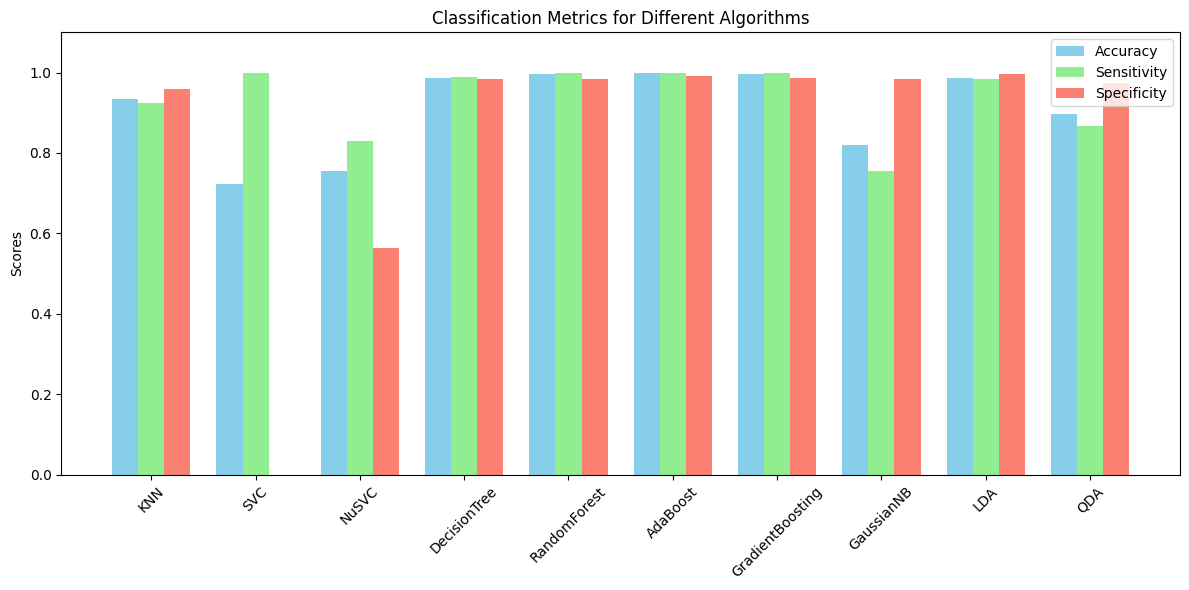

In [223]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifiers = [
    "KNN", "SVC", "NuSVC", "DecisionTree", "RandomForest",
    "AdaBoost", "GradientBoosting", "GaussianNB", 
    "LDA", "QDA"
]

# Corresponding results
accuracy = [0.9335, 0.7223, 0.7561, 0.9872, 0.9953, 0.9977, 0.9965, 0.8191, 0.9872, 0.8973]
sensitivity = [0.9241, 1.0, 0.8304, 0.9887, 1.0, 1.0, 1.0, 0.7561, 0.9838, 0.8675]
specificity = [0.9580, 0.0, 0.5630, 0.9832, 0.9832, 0.9916, 0.9874, 0.9832, 0.9958, 0.9748]

# X-axis positions
x = np.arange(len(classifiers))
width = 0.25

# Create bar chart
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x - width, accuracy, width, label='Accuracy', color='skyblue')
ax.bar(x, sensitivity, width, label='Sensitivity', color='lightgreen')
ax.bar(x + width, specificity, width, label='Specificity', color='salmon')

# Labels and title
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics for Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45)
ax.set_ylim(0, 1.1)
ax.legend()

plt.tight_layout()
plt.show()


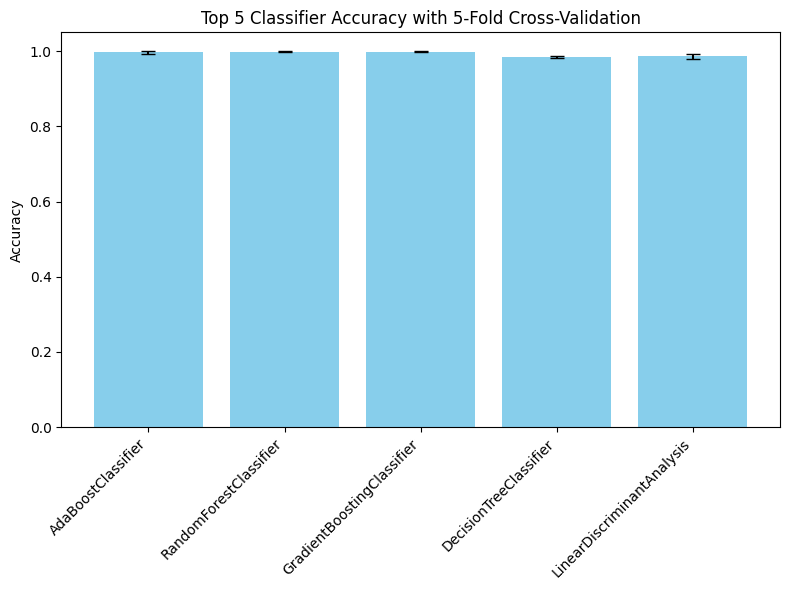

In [224]:
# Error bar wit 5-fold cross validation 

from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt

# Define top 5 classifiers
best_classifiers = [
    AdaBoostClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    LinearDiscriminantAnalysis()
]

classifier_names = [clf.__class__.__name__ for clf in best_classifiers]

# 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

means = []
stds = []

for clf in best_classifiers:
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    means.append(scores.mean())
    stds.append(scores.std())

# Plot
plt.figure(figsize=(8,6))
plt.bar(classifier_names, means, yerr=stds, capsize=5, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Top 5 Classifier Accuracy with 5-Fold Cross-Validation')
plt.ylim(0, 1.05)  
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The above graph shows that my classifieres have a small error bar, it means its accuracy across the 5 folds do not vary much.

In this plot, classifiers have tall bars with small error bars, we can say they are both highly accurate and consistent, making them reliable for phishing detection.

# Feature selection 

In [227]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import pandas as pd

# List of classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

feature_names = df.drop(['Class'], axis=1).columns  # assuming 'Class' is your label
top_features = {}

# Fit and get feature importances
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    importances = clf.feature_importances_
    # Create a sorted dataframe
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    top_features[name] = importance_df.head(10)  # top 10 features
    print(f"\n{name} Top Features:\n", importance_df.head(10))



Decision Tree Top Features:
                       Feature  Importance
28         Words of length 16    0.534617
96           Number diversity    0.237582
231  Soundex homogeneity mean    0.081815
13          Words of length 1    0.057365
48           Frequency of "!"    0.021237
58          Use of upper case    0.018427
205            fair frequency    0.017490
143    prepositions frequency    0.013633
61      Quotation length mean    0.004613
20          Words of length 8    0.004524

Random Forest Top Features:
                    Feature  Importance
28      Words of length 16    0.080708
96        Number diversity    0.078981
13       Words of length 1    0.047279
12        Word length mean    0.043772
0    Total number of words    0.043194
95          Use of numbers    0.034426
58       Use of upper case    0.034353
50        Frequency of "("    0.033834
47        Frequency of "/"    0.033461
148         math frequency    0.031289

AdaBoost Top Features:
                         

In [228]:
# List of top features from all classifiers - let's see which feature appears where...
top_features = [
    'Words of length 16', 'Number diversity', 'Words of length 1',
    'Soundex homogeneity maximum', 'Frequency of "!"', 'fair frequency',
    'acquaintances frequency', 'prepositions frequency', 'Quotations number',
    'Punctuation characters ratio', 'Coleman–Liau index', 'Use of numbers',
    'Total number of words', 'math frequency', 'Word length mean',
    ',Frequency of -"', 'Automated readability index', 'Frequency of ":"',
    'Use of upper case', 'Word repetition span 3', 'restaurants frequency',
    'Soundex homogeneity mean', 'occupation frequency', 'Frequency of "/"'
]

# Group by class and compute mean for each feature
class_feature_means = df.groupby('Class')[top_features].mean()

print(class_feature_means)


       Words of length 16  Number diversity  Words of length 1  \
Class                                                            
0                0.014684          0.013623           0.012966   
1                0.002318          0.082670           0.067828   

       Soundex homogeneity maximum  Frequency of "!"  fair frequency  \
Class                                                                  
0                         0.185822          0.011249        0.006903   
1                         0.190011          0.007210        0.002525   

       acquaintances frequency  prepositions frequency  Quotations number  \
Class                                                                       
0                     0.010910                0.114791           0.000000   
1                     0.007869                0.087534           5.452536   

       Punctuation characters ratio  ...  Word length mean  ,Frequency of -"  \
Class                                ...                 

Numeric and Structural Cues

Phishing emails (Class 0) often contain longer words and template-like sequences rather than frequent short words or numeric diversity. Features such as Words of length 16 and Soundex homogeneity are more prominent in phishing emails, reflecting repeated phrases, URLs, or structured template content. In contrast, legitimate emails (Class 1) show higher values for Number diversity and Words of length 1, indicating more natural numeric content and short words typical in routine correspondence. These structural differences help discriminate phishing from legitimate messages.

Stylistic and Linguistic Cues

Legitimate emails (Class 1) tend to have richer linguistic structure, with higher Word length mean and Prepositions frequency. This reflects coherent sentence construction and natural language usage. Phishing emails (Class 0) are more template-driven, favoring repeated structures and consistent phrasing, making stylistic and linguistic patterns useful for classification.

Formatting and Punctuation Cues

Phishing emails (Class 0) show moderate punctuation use and template-specific formatting, while legitimate emails (Class 1) exhibit higher Quotations number and Punctuation characters ratio. This indicates that legitimate emails are more variable and naturally formatted, whereas phishing messages follow rigid patterns.

Overall Implications for Detection

By combining structural, stylistic, and formatting cues, these features provide clear differentiation between phishing and legitimate emails. Phishing emails tend to have longer template-like words, consistent phrase repetition, and structured patterns, whereas legitimate emails are linguistically richer, more numerically diverse, and naturally punctuated. Leveraging these distinctions allows machine learning models to detect phishing with high accuracy and interpretability.

### Conclusion

Analyzing structural, linguistic, and formatting features offers a robust approach to phishing detection. Recognizing which features are strongly associated with phishing versus legitimate emails improves both model performance and actionable insights for email security.

### Some top Features - class interpretation and visualization

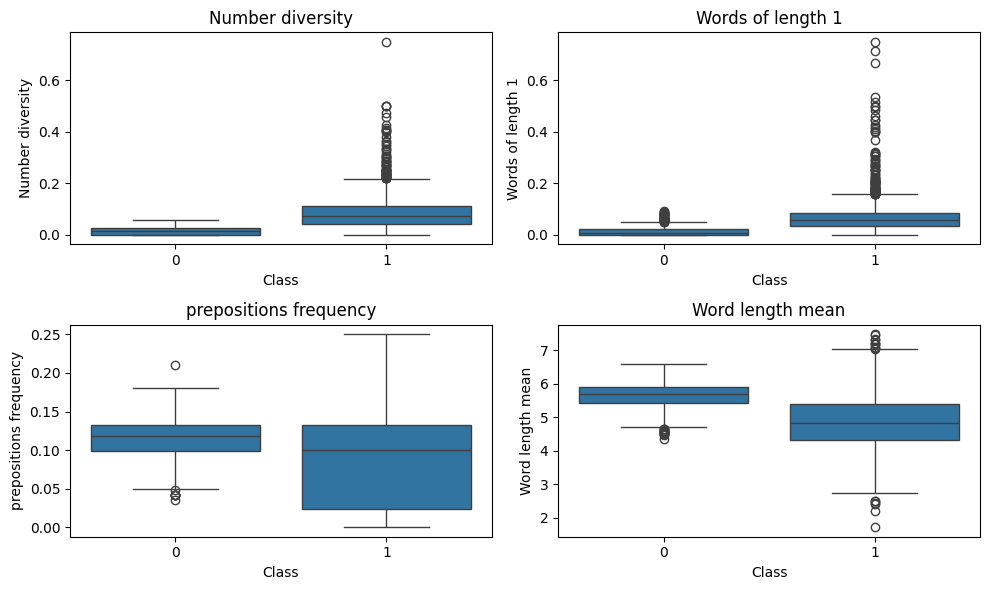

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top features to visualize (2 phishing, 2 legitimate)
top_features = ['Number diversity', 'Words of length 1', 'prepositions frequency', 'Word length mean']

# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(top_features):
    sns.boxplot(x='Class', y=feature, data=df, ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()



The boxplots of selected features reveal clear differences between phishing (Class 0) and legitimate (Class 1) emails. Phishing emails tend to contain longer words, reflecting template-like or structured content, whereas legitimate emails exhibit higher numeric diversity and more frequent single-character words, indicative of natural numeric usage and routine text. Additionally, legitimate emails show higher preposition usage, highlighting more coherent and grammatically rich language, while phishing emails follow more repetitive and formulaic patterns. These distinctions in linguistic, numeric, and structural properties provide interpretable cues that can be leveraged by machine learning models to accurately differentiate phishing from legitimate messages.

# Regression

In [250]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from scipy.stats import pearsonr
from sklearn.utils import shuffle

# Shuffle dataset
df = shuffle(df, random_state=42)

# Create Email_Length feature
df['Email_Length'] = df['Total number of words']

# Regression (Exploring Email Length)

# Features: all columns except 'Email_Length'
X_reg = df.drop(['Email_Length'], axis=1)
y_reg = df['Email_Length']

# Define train size
train_size = int(0.7 * len(df))  # 70% for training

# Train-test split
X_train_reg = X_reg.iloc[:train_size].values
X_test_reg = X_reg.iloc[train_size:].values
y_train_reg = y_reg.iloc[:train_size].values
y_test_reg = y_reg.iloc[train_size:].values

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=500, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = rf_reg.predict(X_test_reg)

# Evaluation
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r, p_value = pearsonr(y_test_reg, y_pred_reg)

print("\n---- Regression Results (Email Length) ----")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Pearson correlation coefficient: {r:.4f}")
print(f"P-value: {p_value:.4g}")



---- Regression Results (Email Length) ----
Mean Absolute Error: 10.82
Pearson correlation coefficient: 0.9708
P-value: 0


### Descriptive statistics for better results??

In [265]:
phishing_mean = df[df['Class']==0]['Email_Length'].mean()
legit_mean = df[df['Class']==1]['Email_Length'].mean()
print(f"Mean length - Phishing: {phishing_mean:.2f}, Legitimate: {legit_mean:.2f}")

# Optional: correlation
r, p = pearsonr(df['Email_Length'], df['Class'])
print(f"Correlation between length and phishing: {r:.4f}, p-value: {p:.4g}")


Mean length - Phishing: 80.34, Legitimate: 355.75
Correlation between length and phishing: 0.2047, p-value: 2.2e-28


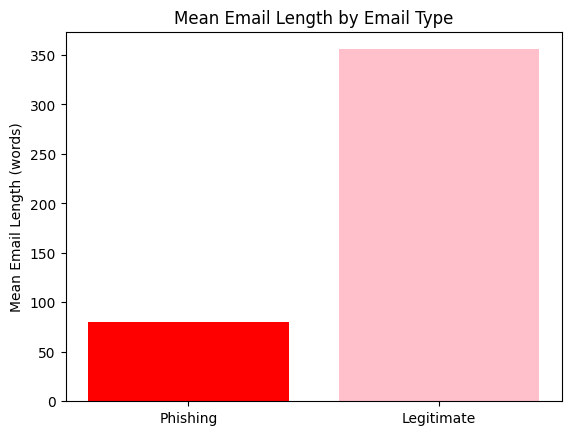

In [272]:
import matplotlib.pyplot as plt

classes = ['Phishing', 'Legitimate']  # match the order
mean_lengths = [80.34, 355.75]

plt.bar(classes, mean_lengths, color=['red', 'pink'])
plt.ylabel('Mean Email Length (words)')
plt.title('Mean Email Length by Email Type')
plt.show()


I explored whether email length could help distinguish phishing from legitimate emails. Phishing emails (Class 0) were significantly shorter than legitimate emails (Class 1), with mean lengths of 80.34 words versus 355.75 words, respectively. The Random Forest Regressor predicted email length with high accuracy, yielding an MAE of 10.82 and a Pearson correlation of 0.9708 (p < 0.001) between predicted and actual values, indicating the model captured underlying structural patterns effectively. Correlation analysis revealed a positive but moderate relationship between email length and phishing likelihood (r = 0.205, p < 0.001), confirming that shorter emails are more likely to be phishing. These findings suggest that email length is a strong, interpretable feature for distinguishing phishing from legitimate messages, consistent with the structural patterns observed in prior feature analysis.